# Import library

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

# Input Data

In [ ]:
#Input data
df = pd.read_excel("data_skripsi_sama.xlsx")
#Mengatur kolom tanggal sebagai indeks
df['Periode'] = pd.to_datetime(df['Periode'])
df.set_index('Periode', inplace=True)

#Tampilkan data
print(df)

            BI Rate     IHSG
Periode                     
2007-01-01     9.50  1.75726
2007-02-01     9.25  1.74097
2007-03-01     9.00  1.83092
2007-04-01     9.00  1.99917
2007-05-01     8.75  2.08432
...             ...      ...
2023-06-01     5.75  6.66188
2023-07-01     5.75  6.93136
2023-08-01     5.75  6.95326
2023-09-01     5.75  6.93989
2023-10-01     6.00  6.75221

[202 rows x 2 columns]


# Visualisasi Data

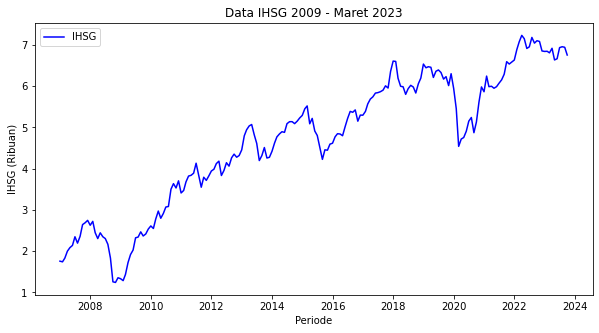

In [ ]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)
plt.plot(df['IHSG'], label='IHSG', color='blue')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')

#Menambahkan Judul
plt.title('Data IHSG 2009 - Maret 2023')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

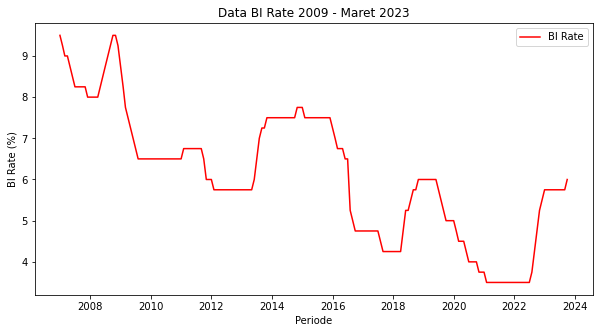

In [ ]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)
plt.plot(df['BI Rate'], label='BI Rate', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')

#Menambahkan Judul
plt.title('Data BI Rate 2009 - Maret 2023')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

# Uji Korelasi

In [ ]:
#Uji korelasi
#Calculate the correlation coefficient
corr_coef = df['BI Rate'].corr(df['IHSG'])

#Print the correlation coefficient
print("Correlation coefficient:", corr_coef)

Correlation coefficient: -0.7462149816750273


In [ ]:
#Hitung koefisien korelasi Pearson
corr_coef, p_value = pearsonr(df['BI Rate'], df['IHSG'])

#Print koefisien korelasi Pearson dan p-value
print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)

#Uji signifikansi
if p_value < 0.05:  # Misalnya, tingkat signifikansi 0.05
    print("Korelasi signifikan.")
else:
    print("Korelasi tidak signifikan.")

Correlation coefficient: -0.746214981675027
P-value: 3.409514833033563e-37
Korelasi signifikan.


# Uji Stasioneritas

In [ ]:
#Uji stasioneritas
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test untuk {name}')
    print('Hasil ADF Statistic:', result[0])
    print('P-Value:', result[1])
    print('Nilai Lag Terbaik:', result[2])
    print('Jumlah Observasi:', result[3])
    print('Kriteria AIC:', result[5])
    print('Kesimpulan:')
    if result[1] <= 0.05:
        print(f"{name} adalah stasioner")
    else:
        print(f"{name} tidak stasioner")

for col in df.columns:
    adf_test(df[col], name=col)

ADF Test untuk BI Rate
Hasil ADF Statistic: -2.242924293495503
P-Value: 0.1910367249582145
Nilai Lag Terbaik: 2
Jumlah Observasi: 199
Kriteria AIC: -148.9948407649618
Kesimpulan:
BI Rate tidak stasioner
ADF Test untuk IHSG
Hasil ADF Statistic: -1.4713610134206283
P-Value: 0.5476280908235247
Nilai Lag Terbaik: 1
Jumlah Observasi: 200
Kriteria AIC: -77.24561938074004
Kesimpulan:
IHSG tidak stasioner


# Differencing

In [ ]:
#Differencing pertama
df_diff = df.diff().dropna()

#Menampilkan DataFrame hasil differencing
print(df_diff.head())

            BI Rate     IHSG
Periode                     
2007-02-01    -0.25 -0.01629
2007-03-01    -0.25  0.08995
2007-04-01     0.00  0.16825
2007-05-01    -0.25  0.08515
2007-06-01    -0.25  0.05496


# Uji Stasioneritas

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test untuk {name}')
    print('Hasil ADF Statistic:', result[0])
    print('P-Value:', result[1])
    print('Nilai Lag Terbaik:', result[2])
    print('Jumlah Observasi:', result[3])
    print('Kriteria AIC:', result[5])
    print('Kesimpulan:')
    if result[1] <= 0.05:
        print(f"{name} adalah stasioner")
    else:
        print(f"{name} tidak stasioner")

for col in df_diff.columns:
    adf_test(df_diff[col], name=col)

ADF Test untuk BI Rate
Hasil ADF Statistic: -5.72996829207833
P-Value: 6.63516375495781e-07
Nilai Lag Terbaik: 1
Jumlah Observasi: 199
Kriteria AIC: -146.49421856116624
Kesimpulan:
BI Rate adalah stasioner
ADF Test untuk IHSG
Hasil ADF Statistic: -12.199832031371484
P-Value: 1.2304580405949067e-22
Nilai Lag Terbaik: 0
Jumlah Observasi: 200
Kriteria AIC: -76.3412248108807
Kesimpulan:
IHSG adalah stasioner


In [ ]:
df_diff

,BI Rate,IHSG
Periode,,
2007-02-01,-0.25,-0.01629
2007-03-01,-0.25,0.08995
2007-04-01,0.00,0.16825
2007-05-01,-0.25,0.08515
2007-06-01,-0.25,0.05496
...,...,...
2023-06-01,0.00,0.02862
2023-07-01,0.00,0.26948
2023-08-01,0.00,0.02190


# Uji Kausalitas Granger

In [ ]:
# Uji kausalitas Granger
# Mengonfigurasi model VAR
var_model = VAR(df_diff)

# Menentukan lag optimal untuk model VAR
lag_order = var_model.select_order()

# Melatih model VAR dengan lag optimal
var_result = var_model.fit(lag_order.selected_orders['aic'])

# Melakukan uji kausalitas Granger antara tiga variabel satu per satu
max_lag = 1  # Anda dapat mengubah nilai lag yang sesuai
for target_var in ['BI Rate', 'IHSG']:
    for test_var in ['BI Rate', 'IHSG']:
        if target_var != test_var:
            print(f'Uji kausalitas Granger antara {target_var} dan {test_var}:')
            result = grangercausalitytests(df[[target_var, test_var]], max_lag, verbose=True)

Uji kausalitas Granger antara BI Rate dan IHSG:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7157  , p=0.0178  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=5.8023  , p=0.0160  , df=1
likelihood ratio test: chi2=5.7202  , p=0.0168  , df=1
parameter F test:         F=5.7157  , p=0.0178  , df_denom=198, df_num=1
Uji kausalitas Granger antara IHSG dan BI Rate:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.5361  , p=0.0113  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=6.6352  , p=0.0100  , df=1
likelihood ratio test: chi2=6.5280  , p=0.0106  , df=1
parameter F test:         F=6.5361  , p=0.0113  , df_denom=198, df_num=1


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,BI Rate_x,IHSG_x
BI Rate_y,1.0000,0.016
IHSG_y,0.0003,1.000


# Uji Kointegrasi

In [ ]:
#Uji Kointegrasi
coint_result = coint_johansen(df, det_order=0, k_ar_diff=1)
print('Tes Kointegrasi Johansen:')
print('Trace Statistic:', coint_result.lr1)
print('P-Value Trace Statistic:', coint_result.cvt[0, 2])
print('Max Eigenvalue Statistic:', coint_result.lr2)
print('P-Value Max Eigenvalue Statistic:', coint_result.cvm[0, 2])

# Jika ada kointegrasi, hitung vektor kointegrasi
if coint_result.lr1[0] > coint_result.cvt[0, 2]:
    print('Ada kointegrasi, dapatkan vektor kointegrasi:')
    alpha = coint_result.evec[:, 0]
    print('Vektor Kointegrasi:', alpha)
else:
    print('Tidak ada kointegrasi.')

Tes Kointegrasi Johansen:
Trace Statistic: [12.39132746  4.87576742]
P-Value Trace Statistic: 19.9349
Max Eigenvalue Statistic: [7.51556004 4.87576742]
P-Value Max Eigenvalue Statistic: 18.52
Tidak ada kointegrasi.


In [ ]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
rank1 = select_coint_rank(df, det_order=0, k_ar_diff=1, method='trace', signif=0.05)
print(rank1.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          12.39          15.49
-------------------------------------


# Penentuan Lag Optimum

In [ ]:
#Split the data into training and testing sets (90% & 10%)
train_size = int(len(df_diff) * 0.9)
train_data, test_data = df_diff[:train_size], df_diff[train_size:]

In [ ]:
train_size_asli = int(len(df)*0.9)
train_data_asli,test_data_asli = df[:train_size_asli], df[train_size_asli:]

In [ ]:
train_data_asli

,BI Rate,IHSG
Periode,,
2007-01-01,9.50,1.75726
2007-02-01,9.25,1.74097
2007-03-01,9.00,1.83092
2007-04-01,9.00,1.99917
2007-05-01,8.75,2.08432
...,...,...
2021-09-01,3.50,6.28694
2021-10-01,3.50,6.59135
2021-11-01,3.50,6.53393


In [ ]:
test_data_asli

,BI Rate,IHSG
Periode,,
2022-02-01,3.50,6.88817
2022-03-01,3.50,7.07144
2022-04-01,3.50,7.22891
2022-05-01,3.50,7.14897
2022-06-01,3.50,6.91158
2022-07-01,3.50,6.95112
2022-08-01,3.75,7.17859
2022-09-01,4.25,7.04080
2022-10-01,4.75,7.09889


In [ ]:
# Penentuan lag terbaik
model = VAR(train_data)
lag_order = model.select_order()
print('Lag Order Terbaik:', lag_order.summary())

Lag Order Terbaik:  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -6.546      -6.508    0.001436      -6.530
1      -6.809*     -6.697*   0.001104*     -6.763*
2       -6.786      -6.598    0.001130      -6.710
3       -6.742      -6.479    0.001181      -6.635
4       -6.749      -6.411    0.001173      -6.612
5       -6.741      -6.329    0.001182      -6.574
6       -6.758      -6.270    0.001163      -6.560
7       -6.712      -6.149    0.001218      -6.484
8       -6.690      -6.052    0.001245      -6.431
9       -6.693      -5.981    0.001242      -6.404
10      -6.651      -5.863    0.001296      -6.331
11      -6.623      -5.761    0.001334      -6.273
12      -6.591      -5.654    0.001379      -6.211
13      -6.554      -5.542    0.001433      -6.143
14      -6.545      -5.458    0.001448      -6.104
--------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Model VAR

In [ ]:
#Initiate VAR model
model = VAR(endog = train_data)
res = model.select_order(10)
res.summary()

# Mengonfigurasi model VAR dengan dua variabel
var_model = VAR(train_data[['BI Rate', 'IHSG']])

# Menentukan lag optimal untuk model VAR
lag_order = var_model.select_order()

# Melatih model VAR dengan lag optimal
var_result = var_model.fit(lag_order.selected_orders['aic'])

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
#Fit to a VAR model
model_fit = model.fit(maxlags=1)
#Print a summary of the model results
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Jul, 2024
Time:                     22:32:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.76860
Nobs:                     179.000    HQIC:                  -6.83212
Log likelihood:           113.372    FPE:                 0.00103285
AIC:                     -6.87544    Det(Omega_mle):     0.000999078
--------------------------------------------------------------------
Results for equation BI Rate
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.014055         0.012435           -1.130           0.258
L1.BI Rate         0.480427         0.066170            7.260           0.000
L1.IHSG           -0.072885         0.062855           -1.160         

# Prediksi dengan Model VAR

In [ ]:
prediksi = model_fit.fittedvalues
prediksi.columns = ["Prediksi BI Rate", "Prediksi IHSG"]
prediksi

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2007-03-01,-0.132974,0.038870
2007-04-01,-0.140718,0.052558
2007-05-01,-0.026318,0.042874
2007-06-01,-0.140368,0.051939
2007-07-01,-0.138167,0.048050
...,...,...
2021-09-01,-0.019905,0.031537
2021-10-01,-0.024014,0.038801
2021-11-01,-0.036242,0.060417


In [ ]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_SBI = prediksi['Prediksi BI Rate']  # Hasil prediksi SBI
prediction_IHSG = prediksi['Prediksi IHSG']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_SBI = train_data['BI Rate'].shift(1)  # Data asli SBI pada periode sebelumnya
original_IHSG = train_data['IHSG'].shift(1)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_SBI = original_SBI + prediction_SBI
predict_undiff_IHSG = original_IHSG + prediction_IHSG

#Membuat DataFrame untuk hasil undifferencing
prediksi2 = pd.DataFrame({'Prediksi BI Rate': predict_undiff_SBI,
                                  'Prediksi IHSG': predict_undiff_IHSG})

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
prediksi2

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2007-02-01,NaN,NaN
2007-03-01,-0.382974,0.022580
2007-04-01,-0.390718,0.142508
2007-05-01,-0.026318,0.211124
2007-06-01,-0.390368,0.137089
...,...,...
2021-09-01,-0.019905,0.111797
2021-10-01,-0.024014,0.175441
2021-11-01,-0.036242,0.364827


In [ ]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_SBI = prediksi2['Prediksi BI Rate']  # Hasil prediksi SBI
prediction_IHSG = prediksi2['Prediksi IHSG']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_SBI = train_data_asli['BI Rate'].shift(1)  # Data asli SBI pada periode sebelumnya
original_IHSG = train_data_asli['IHSG'].shift(1)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_SBI = original_SBI + prediction_SBI
predict_undiff_IHSG = original_IHSG + prediction_IHSG

#Membuat DataFrame untuk hasil undifferencing
predict_undiff_df = pd.DataFrame({'Prediksi BI Rate': predict_undiff_SBI,
                                  'Prediksi IHSG': predict_undiff_IHSG})

#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
predict_undiff_df = predict_undiff_df.iloc[2:]

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
predict_undiff_df

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2007-03-01,8.867026,1.763550
2007-04-01,8.609282,1.973428
2007-05-01,8.973682,2.210294
2007-06-01,8.359632,2.221409
2007-07-01,8.111833,2.242290
...,...,...
2021-09-01,3.480095,6.262097
2021-10-01,3.475986,6.462381
2021-11-01,3.463758,6.956177


In [ ]:
#RUN TERAKHIR
df_prediksi = pd.DataFrame(predict_undiff_df)

# Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataprediksi_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_prediksi.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataprediksi_sama.xlsx


## Visualisasi Prediksi & Data Aktual (Data Train)

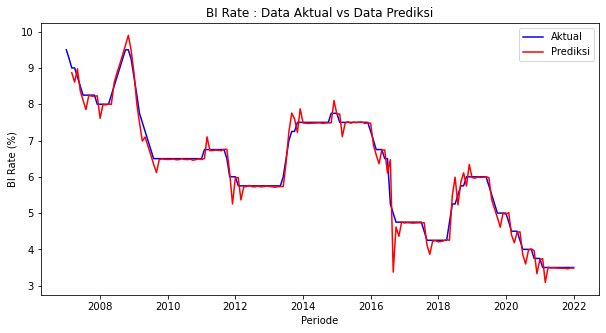

In [ ]:
#Pilih kolom SBI dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(train_data_asli['BI Rate'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(predict_undiff_df['Prediksi BI Rate'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')

#Menambahkan Judul
plt.title('BI Rate : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

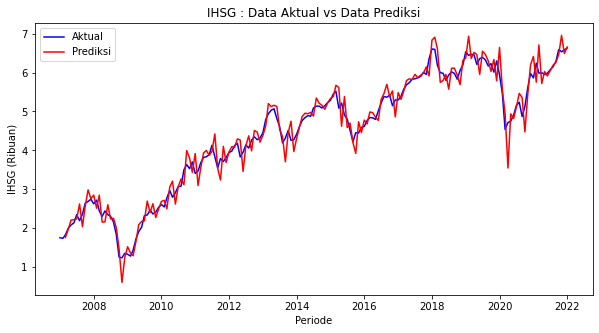

In [ ]:
#Pilih kolom IHSG dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(train_data_asli['IHSG'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(predict_undiff_df['Prediksi IHSG'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')

#Menambahkan Judul
plt.title('IHSG : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

## Prediksi data testing

In [ ]:
df_diff_test = test_data.diff().dropna()

#Menampilkan DataFrame hasil differencing
df_diff_test.shape

(20, 2)

In [ ]:
lag_order = model_fit.k_ar
prediksi_test = model_fit.forecast(df_diff.values[-lag_order:], len(df_diff_test))
prediksi_test = pd.DataFrame(prediksi_test, index=df_diff_test.index, columns=df_diff_test.columns)
prediksi_test.columns = ["Prediksi BI Rate", "Prediksi IHSG"]
prediksi_test

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2022-03-01,0.119731,-0.022757
2022-04-01,0.045126,0.008794
2022-05-01,0.006984,0.018760
2022-06-01,-0.012067,0.023061
2022-07-01,-0.021533,0.025122
2022-08-01,-0.026231,0.026136
2022-09-01,-0.028562,0.026638
2022-10-01,-0.029718,0.026887
2022-11-01,-0.030292,0.027011


In [ ]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_SBI = prediksi_test['Prediksi BI Rate']  # Hasil prediksi SBI
prediction_IHSG = prediksi_test['Prediksi IHSG']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_SBI = test_data['BI Rate'].shift(1)  # Data asli SBI pada periode sebelumnya
original_IHSG = test_data['IHSG'].shift(1)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_SBI = original_SBI + prediction_SBI
predict_undiff_IHSG = original_IHSG + prediction_IHSG

#Membuat DataFrame untuk hasil undifferencing
prediksi_test2 = pd.DataFrame({'Prediksi BI Rate': predict_undiff_SBI,
                                  'Prediksi IHSG': predict_undiff_IHSG})

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
prediksi_test2

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2022-02-01,NaN,NaN
2022-03-01,0.119731,0.234263
2022-04-01,0.045126,0.192064
2022-05-01,0.006984,0.176230
2022-06-01,-0.012067,-0.056879
2022-07-01,-0.021533,-0.212268
2022-08-01,-0.026231,0.065676
2022-09-01,0.221438,0.254108
2022-10-01,0.470282,-0.110903


In [ ]:
#Misalkan Anda memiliki hasil prediksi untuk tiga variabel yang berbeda
prediction_SBI = prediksi_test2['Prediksi BI Rate']  # Hasil prediksi SBI
prediction_IHSG = prediksi_test2['Prediksi IHSG']  # Hasil prediksi IHSG

#Mengambil data asli pada periode waktu sebelumnya
original_SBI = test_data_asli['BI Rate'].shift(1)  # Data asli SBI pada periode sebelumnya
original_IHSG = test_data_asli['IHSG'].shift(1)  # Data asli IHSG pada periode sebelumnya

#Mengundifferencing hasil prediksi
predict_undiff_SBI = original_SBI + prediction_SBI
predict_undiff_IHSG = original_IHSG + prediction_IHSG

#Membuat DataFrame untuk hasil undifferencing
test_predict_undiff_df = pd.DataFrame({'Prediksi BI Rate': predict_undiff_SBI,
                                  'Prediksi IHSG': predict_undiff_IHSG})

#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
test_predict_undiff_df = test_predict_undiff_df.iloc[1:]

#Menampilkan DataFrame hasil prediksi yang telah di-undifferencing
test_predict_undiff_df

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2022-03-01,3.619731,7.122433
2022-04-01,3.545126,7.263504
2022-05-01,3.506984,7.405140
2022-06-01,3.487933,7.092091
2022-07-01,3.478467,6.699312
2022-08-01,3.473769,7.016796
2022-09-01,3.971438,7.432698
2022-10-01,4.720282,6.929897
2022-11-01,5.219708,7.183991


In [ ]:
#RUN TERAKHIR
df_prediksi_test = pd.DataFrame(test_predict_undiff_df)

# Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataprediksitest_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_prediksi_test.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataprediksitest_sama.xlsx


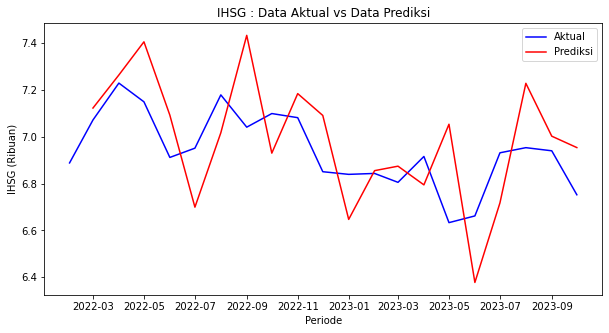

In [ ]:
#Pilih kolom IHSG dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(test_data_asli['IHSG'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(test_predict_undiff_df['Prediksi IHSG'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')

#Menambahkan Judul
plt.title('IHSG : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

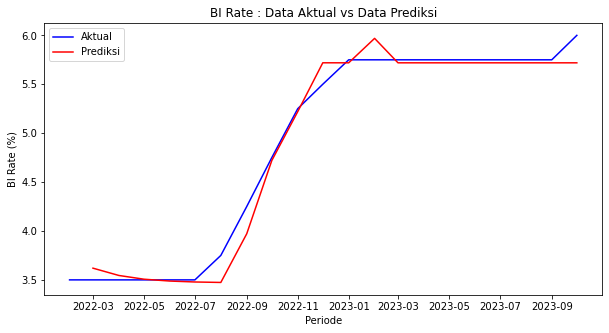

In [ ]:
#Pilih kolom SBI dari DataFrame df
col = df.columns[0]

plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

#Plot data aktual dengan garis biru
plt.plot(test_data_asli['BI Rate'], label='Aktual', color='blue')

#Plot data prediksi dengan garis merah
plt.plot(test_predict_undiff_df['Prediksi BI Rate'], label='Prediksi', color='red')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')

#Menambahkan Judul
plt.title('BI Rate : Data Aktual vs Data Prediksi')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

<Figure size 720x360 with 0 Axes>

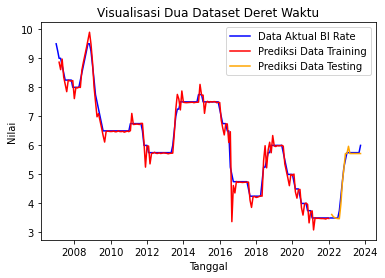

In [ ]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)
# Membuat figure dan axis
fig, ax = plt.subplots()

# Memplot data pertama
plt.plot(train_data_asli['BI Rate'], label='Data Aktual BI Rate', color='blue')
ax.plot(predict_undiff_df.index, predict_undiff_df['Prediksi BI Rate'], label='Prediksi Data Training', color='red')

# Memplot data kedua
plt.plot(test_data_asli['BI Rate'], color='blue')
ax.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi BI Rate'],label='Prediksi Data Testing', color='orange')

# Menambahkan judul dan label sumbu
ax.set_title('Visualisasi Dua Dataset Deret Waktu')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Nilai')

# Menambahkan legenda
ax.legend()

# Menampilkan plot
plt.show()

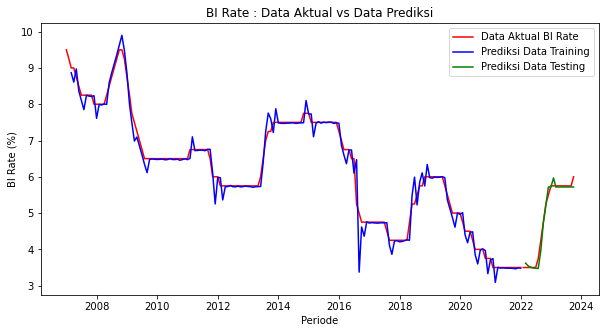

In [ ]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['BI Rate'], label='Data Aktual BI Rate', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi BI Rate'], label='Prediksi Data Training', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['BI Rate'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi BI Rate'],label='Prediksi Data Testing', color='green')

# Menambahkan judul dan label sumbu
plt.title('BI Rate : Data Aktual vs Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

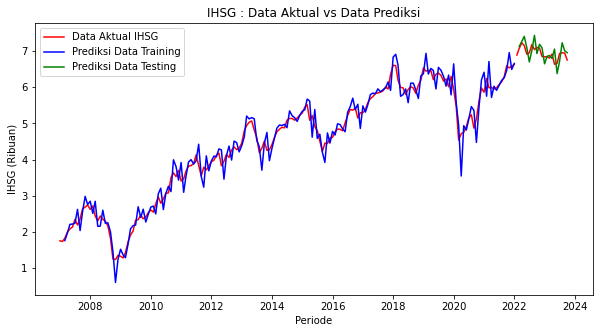

In [ ]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['IHSG'], label='Data Aktual IHSG', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi IHSG'], label='Prediksi Data Training', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['IHSG'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi IHSG'],label='Prediksi Data Testing', color='green')

# Menambahkan judul dan label sumbu
plt.title('IHSG : Data Aktual vs Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
test_data_asli = test_data_asli.iloc[1:]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
#Evaluate the model
mse = mean_squared_error(test_data_asli, test_predict_undiff_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(test_data_asli, test_predict_undiff_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(test_data_asli, test_predict_undiff_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.0319160239901487
Mean Absolute Percentage Error: 0.02280097479589096
Mean Absolute Error: 0.13691933178276894
Accuracy: 99.97719902520411


# Peramalan dengan Model VAR

In [ ]:
data_update = pd.read_excel('data_update_sama.xlsx')

In [ ]:
# Set kolom "Date" sebagai indeks
data_update.set_index('Periode', inplace=True)

In [ ]:
#DATA ASLI
#Melakukan peramalan untuk beberapa periode ke depan
forecast_steps = 6  # Ganti dengan jumlah peiode yang Anda inginkan
forecasted_values = var_result.forecast(df.values[-model_fit.k_ar:], steps=forecast_steps)
forecast_index = data_update.index[-forecast_steps:]
#Mengonfigurasi hasil peramalan ke dalam DataFrame
forecast_actual_df = pd.DataFrame(forecasted_values, index = forecast_index, columns=['Forecast_SBI', 'Forecast_IHSG'])

#Menampilkan hasil peramalan
print(f'Hasil Peramalan untuk {forecast_steps} Langkah ke Depan:')
print(forecast_actual_df)

Hasil Peramalan untuk 6 Langkah ke Depan:
            Forecast_SBI  Forecast_IHSG
Periode                                
2023-11-01      2.376372       0.416622
2023-12-01      1.097253      -0.113073
2024-01-01      0.521337      -0.080154
2024-02-01      0.242252      -0.030364
2024-03-01      0.104542      -0.001876
2024-04-01      0.036307       0.012686


In [ ]:
#Assuming df_diff contains the differenced data
#Get the last observed values from the original data as a Series
last_observed_values = df.iloc[-1]

#Inverse difference to obtain the forecasted values in the original scale
forecasted_values_original = []
for i in range(forecast_steps):
    forecasted_step_diff = forecasted_values[i]
    forecasted_step_original = last_observed_values + forecasted_step_diff
    forecasted_values_original.append(forecasted_step_original)

forecast_index = data_update.index[-forecast_steps:]
#Create a DataFrame to store the undifferenced forecasted values
forecast_df_original = pd.DataFrame(forecasted_values_original, index = forecast_index, columns=df.columns)

#Display the undifferenced forecasted values
print(f'Undifferenced Forecasted Values for {forecast_steps} Steps Ahead:')
print(forecast_df_original)

Undifferenced Forecasted Values for 6 Steps Ahead:
             BI Rate      IHSG
Periode                       
2023-11-01  8.376372  7.168832
2023-12-01  7.097253  6.639137
2024-01-01  6.521337  6.672056
2024-02-01  6.242252  6.721846
2024-03-01  6.104542  6.750334
2024-04-01  6.036307  6.764896


In [ ]:
df_peramalan = pd.DataFrame(forecast_df_original)

# Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataperamalan_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_peramalan.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataperamalan_sama.xlsx


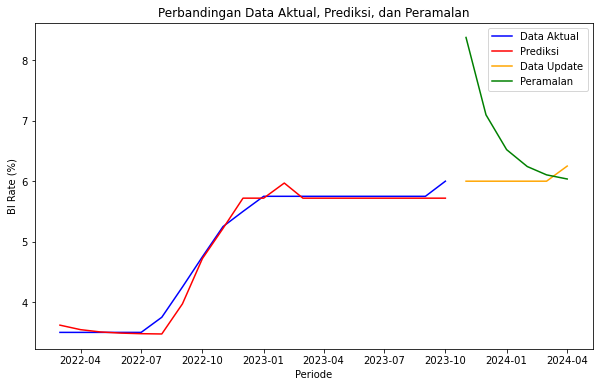

In [ ]:
df_last70 = test_data_asli
predict_undiff_last70 = predict_undiff_df.iloc[-200:]

plt.figure(figsize=(10,6))

plt.plot(df_last70.index, df_last70['BI Rate'], color='blue', label='Data Aktual')

plt.plot(test_predict_undiff_df['Prediksi BI Rate'], label='Prediksi', color='red')

plt.plot(data_update['BI Rate'], color='orange', label= 'Data Update')

plt.plot(df_peramalan.index, df_peramalan['BI Rate'], color='green', label='Peramalan')

plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan')

# Tambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

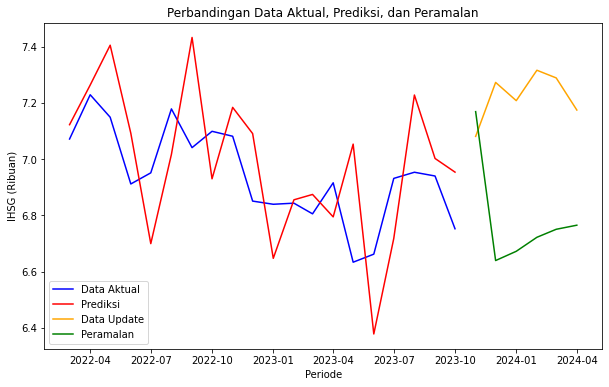

In [ ]:
df_last70 = test_data_asli
predict_undiff_last70 = predict_undiff_df.iloc[-200:]

plt.figure(figsize=(10,6))

plt.plot(df_last70.index, df_last70['IHSG'], color='blue', label='Data Aktual')

plt.plot(test_predict_undiff_df['Prediksi IHSG'], label='Prediksi', color='red')

plt.plot(data_update['IHSG'], color='orange', label= 'Data Update')

plt.plot(df_peramalan.index, df_peramalan['IHSG'], color='green', label='Peramalan')

plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan')

# Tambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
import numpy as np
from scipy.stats import f

def hotellings_t2(X, Y):
    # Memastikan input adalah array numpy 2D
    X = np.asarray(X)
    Y = np.asarray(Y)

    if X.ndim == 1:
        X = X.reshape(-1, 1)
    if Y.ndim == 1:
        Y = Y.reshape(-1, 1)

    # Ukuran sampel dan jumlah variabel
    n1, p = X.shape
    n2, _ = Y.shape

    # Rata-rata sampel
    X_mean = np.mean(X, axis=0)
    Y_mean = np.mean(Y, axis=0)

    # Kovariansi sampel
    S1 = np.cov(X, rowvar=False)
    S2 = np.cov(Y, rowvar=False)

 # Kovariansi gabungan (spooled)
    S_pool = ((n1 - 1) * S1 + (n2 - 1) * S2) / (n1 + n2 - 2)

    # Statistik T^2 Hotelling
    mean_diff = X_mean - Y_mean
    T2 = (n1 * n2) / (n1 + n2) * mean_diff.T @ np.linalg.inv(S_pool) @ mean_diff

    # Nilai F untuk konversi ke statistik F
    F_stat = (n1 + n2 - p - 1) * T2 / (p * (n1 + n2 - 2))

    # Derajat kebebasan
    df1 = p
    df2 = n1 + n2 - p - 1

    # Nilai p
    p_value = 1 - f.cdf(F_stat, df1, df2)

    return T2, F_stat, p_value

# Contoh penggunaan dengan dua variabel
# Data harga aktual (harga emas dan harga perak)

# Hitung uji T^2 Hotelling
T2, F_stat, p_value = hotellings_t2(data_update, df_peramalan)

print(f"Statistik T^2: {T2}")
print(f"Statistik F: {F_stat}")
print(f"Nilai p: {p_value}")

# Daerah kritis dan kesimpulan
alpha = 0.05
df1 = 1
df2 = len(data_update) + len(df_peramalan) - df1 - 1

# F-nilai kritis
F_critical = f.ppf(1 - alpha, df1, df2)

print(f"F-nilai kritis: {F_critical}")

# Kesimpulan
if F_stat > F_critical:
    print("Tolak H0: Ada perbedaan signifikan antara data aktual IHSG dan BI Rate dengan data peramalan IHSG dan BI Rate.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara data aktual IHSG dan BI Rate dengan data peramalan IHSG dan BI Rate.")

Statistik T^2: 79.42778515355714
Statistik F: 35.74250331910071
Nilai p: 5.228460887385378e-05
F-nilai kritis: 4.9646027437307145
Tolak H0: Ada perbedaan signifikan antara data aktual IHSG dan BI Rate dengan data peramalan IHSG dan BI Rate.


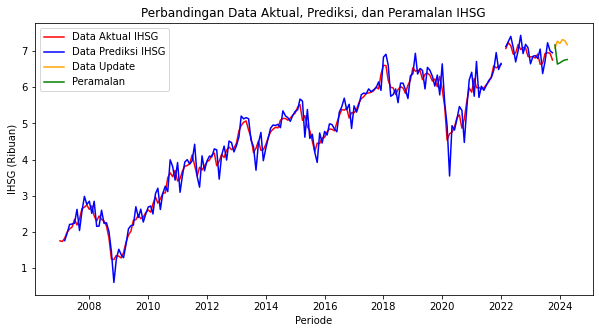

In [ ]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['IHSG'], label='Data Aktual IHSG', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi IHSG'], label='Data Prediksi IHSG', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['IHSG'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi IHSG'], color='blue')

plt.plot(data_update['IHSG'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['IHSG'], color='green', label='Peramalan')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan IHSG')
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

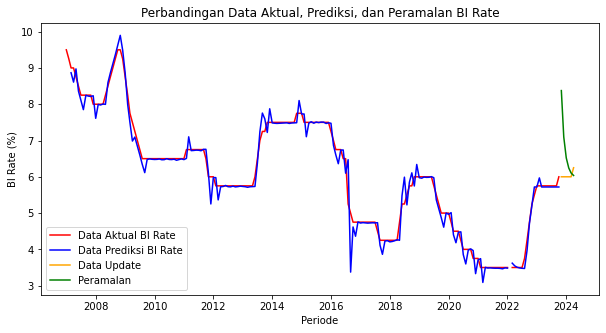

In [ ]:
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(train_data_asli['BI Rate'], label='Data Aktual BI Rate', color='red')
plt.plot(predict_undiff_df.index, predict_undiff_df['Prediksi BI Rate'], label='Data Prediksi BI Rate', color='blue')

# Memplot data kedua
plt.plot(test_data_asli['BI Rate'], color='red')
plt.plot(test_predict_undiff_df.index, test_predict_undiff_df['Prediksi BI Rate'], color='blue')

plt.plot(data_update['BI Rate'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['BI Rate'], color='green', label='Peramalan')

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Data Aktual, Prediksi, dan Peramalan BI Rate')
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

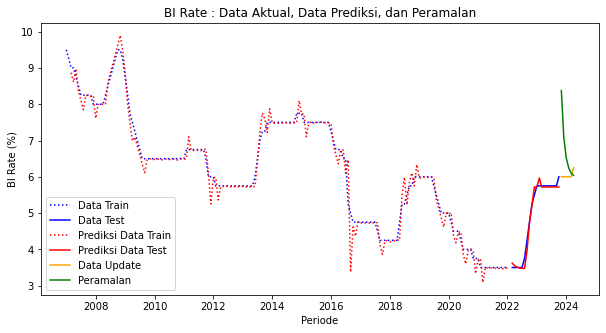

In [ ]:
plt.figure(figsize=(10, 5))
#Plot data aktual
plt.plot(train_data_asli['BI Rate'], label='Data Train', color='blue', linestyle='dotted')
plt.plot(test_data_asli['BI Rate'], label='Data Test', color='blue')

#Plot data prediksi
plt.plot(predict_undiff_df['Prediksi BI Rate'], label='Prediksi Data Train', color='red', linestyle='dotted')
plt.plot(test_predict_undiff_df['Prediksi BI Rate'], label='Prediksi Data Test', color='red')

plt.plot(data_update['BI Rate'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['BI Rate'], color='green', label='Peramalan')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')

#Menambahkan Judul
plt.title('BI Rate : Data Aktual, Data Prediksi, dan Peramalan')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

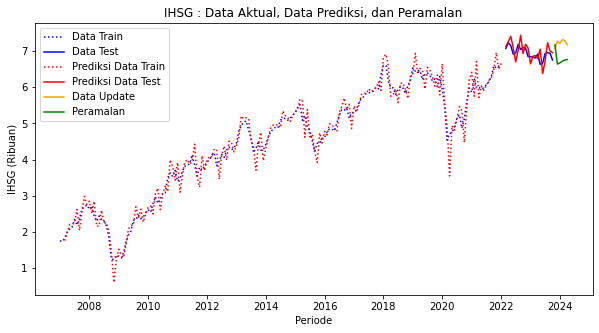

In [ ]:
plt.figure(figsize=(10, 5))
#Plot data aktual
plt.plot(train_data_asli['IHSG'], label='Data Train', color='blue', linestyle='dotted')
plt.plot(test_data_asli['IHSG'], label='Data Test', color='blue')

#Plot data prediksi
plt.plot(predict_undiff_df['Prediksi IHSG'], label='Prediksi Data Train', color='red', linestyle='dotted')
plt.plot(test_predict_undiff_df['Prediksi IHSG'], label='Prediksi Data Test', color='red')

plt.plot(data_update['IHSG'], color='orange', label= 'Data Update')
plt.plot(df_peramalan.index, df_peramalan['IHSG'], color='green', label='Peramalan')

#Menambahkan label sumbu x dan y
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')

#Menambahkan Judul
plt.title('IHSG : Data Aktual, Data Prediksi, dan Peramalan')

#Menambahkan legenda
plt.legend()

#Menampilkan plot
plt.show()

# Menghitung Residual VAR

In [ ]:
residual = model_fit.resid
residual.columns = ["Residual BI Rate", "Residual IHSG"]
residual

,Residual BI Rate,Residual IHSG
Periode,,
2007-03-01,-0.117026,0.051080
2007-04-01,0.140718,0.115692
2007-05-01,-0.223682,0.042276
2007-06-01,-0.109632,0.003021
2007-07-01,-0.111833,0.161340
...,...,...
2021-09-01,0.019905,0.105103
2021-10-01,0.024014,0.265609
2021-11-01,0.036242,-0.117837


In [ ]:
#Membuat dataframe residuals
residuals = pd.DataFrame(residual)

residuals

,Residual BI Rate,Residual IHSG
Periode,,
2007-03-01,-0.117026,0.051080
2007-04-01,0.140718,0.115692
2007-05-01,-0.223682,0.042276
2007-06-01,-0.109632,0.003021
2007-07-01,-0.111833,0.161340
...,...,...
2021-09-01,0.019905,0.105103
2021-10-01,0.024014,0.265609
2021-11-01,0.036242,-0.117837


In [ ]:
residuals_test_ihsg = test_data_asli['IHSG'] - test_predict_undiff_df['Prediksi IHSG']

residuals_test_ihsg

Periode
2022-03-01   -0.050993
2022-04-01   -0.034594
2022-05-01   -0.256170
2022-06-01   -0.180511
2022-07-01    0.251808
2022-08-01    0.161794
2022-09-01   -0.391898
2022-10-01    0.168993
2022-11-01   -0.102681
2022-12-01   -0.240182
2023-01-01    0.192308
2023-02-01   -0.011937
2023-03-01   -0.068985
2023-04-01    0.121271
2023-05-01   -0.420030
2023-06-01    0.283949
2023-07-01    0.213728
2023-08-01   -0.274712
2023-09-01   -0.062402
2023-10-01   -0.201442
dtype: float64

In [ ]:
residuals_test_birate = test_data_asli['BI Rate'] - test_predict_undiff_df['Prediksi BI Rate']

residuals_test_birate

Periode
2022-03-01   -0.119731
2022-04-01   -0.045126
2022-05-01   -0.006984
2022-06-01    0.012067
2022-07-01    0.021533
2022-08-01    0.276231
2022-09-01    0.278562
2022-10-01    0.029718
2022-11-01    0.030292
2022-12-01   -0.219423
2023-01-01    0.030718
2023-02-01   -0.219212
2023-03-01    0.030823
2023-04-01    0.030840
2023-05-01    0.030848
2023-06-01    0.030853
2023-07-01    0.030855
2023-08-01    0.030856
2023-09-01    0.030856
2023-10-01    0.280857
dtype: float64

In [ ]:
residuals_combined_df = pd.DataFrame({
    'Residuals IHSG': residuals_test_ihsg,
    'Residuals BI Rate': residuals_test_birate
})

print(residuals_combined_df)

            Residuals IHSG  Residuals BI Rate
Periode                                      
2022-03-01       -0.050993          -0.119731
2022-04-01       -0.034594          -0.045126
2022-05-01       -0.256170          -0.006984
2022-06-01       -0.180511           0.012067
2022-07-01        0.251808           0.021533
2022-08-01        0.161794           0.276231
2022-09-01       -0.391898           0.278562
2022-10-01        0.168993           0.029718
2022-11-01       -0.102681           0.030292
2022-12-01       -0.240182          -0.219423
2023-01-01        0.192308           0.030718
2023-02-01       -0.011937          -0.219212
2023-03-01       -0.068985           0.030823
2023-04-01        0.121271           0.030840
2023-05-01       -0.420030           0.030848
2023-06-01        0.283949           0.030853
2023-07-01        0.213728           0.030855
2023-08-01       -0.274712           0.030856
2023-09-01       -0.062402           0.030856
2023-10-01       -0.201442        

In [ ]:
#Membuat dataframe residuals
residuals_test = pd.DataFrame(residuals_combined_df)

residuals_test

,Residuals IHSG,Residuals BI Rate
Periode,,
2022-03-01,-0.050993,-0.119731
2022-04-01,-0.034594,-0.045126
2022-05-01,-0.256170,-0.006984
2022-06-01,-0.180511,0.012067
2022-07-01,0.251808,0.021533
2022-08-01,0.161794,0.276231
2022-09-01,-0.391898,0.278562
2022-10-01,0.168993,0.029718
2022-11-01,-0.102681,0.030292


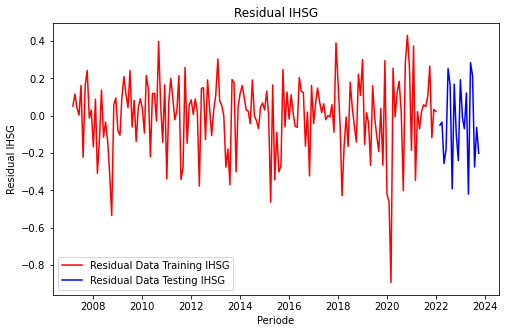

In [ ]:
plt.figure(figsize=(8, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(residuals['Residual IHSG'], label='Residual Data Training IHSG', color='red')

plt.plot(residuals_test['Residuals IHSG'], label='Residual Data Testing IHSG', color='blue')

# Menambahkan judul dan label sumbu
plt.title('Residual IHSG')
plt.xlabel('Periode')
plt.ylabel('Residual IHSG')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

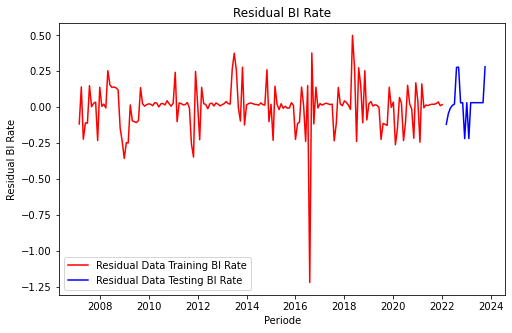

In [ ]:
plt.figure(figsize=(8, 5))  # Mengatur ukuran plot (opsional)

# Memplot data pertama
plt.plot(residuals['Residual BI Rate'], label='Residual Data Training BI Rate', color='red')

plt.plot(residuals_test['Residuals BI Rate'], label='Residual Data Testing BI Rate', color='blue')

# Menambahkan judul dan label sumbu
plt.title('Residual BI Rate')
plt.xlabel('Periode')
plt.ylabel('Residual BI Rate')


# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
df_residual = pd.DataFrame(residuals)

#Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataresidual_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_residual.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataresidual_sama.xlsx


In [ ]:
test_data19 = test_data.iloc[1:]
test_data19

,BI Rate,IHSG
Periode,,
2022-03-01,0.00,0.18327
2022-04-01,0.00,0.15747
2022-05-01,0.00,-0.07994
2022-06-01,0.00,-0.23739
2022-07-01,0.00,0.03954
2022-08-01,0.25,0.22747
2022-09-01,0.50,-0.13779
2022-10-01,0.50,0.05809
2022-11-01,0.50,-0.01758


In [ ]:
prediksi_test2 = prediksi_test2.iloc[1:]
prediksi_test2

,Prediksi BI Rate,Prediksi IHSG
Periode,,
2022-03-01,0.119731,0.234263
2022-04-01,0.045126,0.192064
2022-05-01,0.006984,0.176230
2022-06-01,-0.012067,-0.056879
2022-07-01,-0.021533,-0.212268
2022-08-01,-0.026231,0.065676
2022-09-01,0.221438,0.254108
2022-10-01,0.470282,-0.110903
2022-11-01,0.469708,0.085101


In [ ]:
#Residual Data test
#Menghitung residual untuk variabel SBI
residual_SBI = test_data19['BI Rate'] - prediksi_test2['Prediksi BI Rate']

#Menghitung residual untuk variabel IHSG
residual_IHSG = test_data19['IHSG'] - prediksi_test2['Prediksi IHSG']

#Membuat dataframe residuals
residuals_test = pd.DataFrame({'Residual BI Rate': residual_SBI,
                             'Residual IHSG': residual_IHSG})

residuals_test

,Residual BI Rate,Residual IHSG
Periode,,
2022-03-01,-0.119731,-0.050993
2022-04-01,-0.045126,-0.034594
2022-05-01,-0.006984,-0.256170
2022-06-01,0.012067,-0.180511
2022-07-01,0.021533,0.251808
2022-08-01,0.276231,0.161794
2022-09-01,0.278562,-0.391898
2022-10-01,0.029718,0.168993
2022-11-01,0.030292,-0.102681


In [ ]:
df_residual_test = pd.DataFrame(residuals_test)

#Menyimpan DataFrame sebagai file Excel
nama_file_excel = 'dataresidualtest_sama.xlsx'  # Nama file Excel yang ingin Anda berikan
df_residual_test.to_excel(nama_file_excel, index=False)  # index=False untuk menghapus kolom indeks saat menyimpan

print(f'DataFrame telah disimpan sebagai file Excel dengan nama: {nama_file_excel}')

DataFrame telah disimpan sebagai file Excel dengan nama: dataresidualtest_sama.xlsx


# Uji Asumsi Residual

In [ ]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results = acorr_ljungbox(residuals['Residual IHSG'], lags=[1], return_df=True)
results

,lb_stat,lb_pvalue
1,0.002636,0.959053


In [ ]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results = acorr_ljungbox(residuals['Residual BI Rate'], lags=[1], return_df=True)
results

,lb_stat,lb_pvalue
1,1.220771,0.269209


In [ ]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results_test = acorr_ljungbox(residuals_test['Residual IHSG'], lags=[1], return_df=True)
results_test

,lb_stat,lb_pvalue
1,2.619005,0.105591


In [ ]:
#Uji asumsi residual white noise
#Assuming residuals is a DataFrame and you want to test the 'column_name'
results_test = acorr_ljungbox(residuals_test['Residual BI Rate'], lags=[1], return_df=True)
results_test

,lb_stat,lb_pvalue
1,1.078087,0.299126


# Akurasi VAR

In [ ]:
#Menghapus baris pertama yang tidak memiliki nilai yang valid setelah differencing
train_data_asli = train_data_asli.iloc[2:]


In [ ]:
predict_undiff_df.shape

(179, 2)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
#Evaluate the model
mse = mean_squared_error(train_data_asli, predict_undiff_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(train_data_asli, predict_undiff_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(train_data_asli, predict_undiff_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.07005793073834568
Mean Absolute Percentage Error: 0.039737083674048504
Mean Absolute Error: 0.1774087232405616
Accuracy: 99.96026291632595


# Import library untuk GRU

In [ ]:
pip install tensorflow==2.12.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Input Data Prediksi

In [ ]:
import pandas as pd

# Load the data
data = pd.read_excel('dataprediksi_sama.xlsx')

# Buat rentang tanggal berdasarkan jumlah baris dalam data
data_index = pd.date_range(start='2007-03-01', periods=len(data), freq='M')

# Atur indeks DataFrame
data.index = data_index

# Tampilkan DataFrame
print(data)


            Prediksi BI Rate  Prediksi IHSG
2007-03-31          8.867026       1.763550
2007-04-30          8.609282       1.973428
2007-05-31          8.973682       2.210294
2007-06-30          8.359632       2.221409
2007-07-31          8.111833       2.242290
...                      ...            ...
2021-09-30          3.480095       6.262097
2021-10-31          3.475986       6.462381
2021-11-30          3.463758       6.956177
2021-12-31          3.490130       6.490308
2022-01-31          3.482479       6.656352

[179 rows x 2 columns]


In [ ]:
data_test = pd.read_excel('dataprediksitest_sama.xlsx')
data_test_index = pd.date_range(start='2022-02-01', periods=len(data_test), freq='M')

# Atur indeks DataFrame
data_test.index = data_test_index

# Tampilkan DataFrame
print(data_test)


            Prediksi BI Rate  Prediksi IHSG
2022-02-28          3.619731       7.122433
2022-03-31          3.545126       7.263504
2022-04-30          3.506984       7.405140
2022-05-31          3.487933       7.092091
2022-06-30          3.478467       6.699312
2022-07-31          3.473769       7.016796
2022-08-31          3.971438       7.432698
2022-09-30          4.720282       6.929897
2022-10-31          5.219708       7.183991
2022-11-30          5.719423       7.090802
2022-12-31          5.719282       6.647032
2023-01-31          5.969212       6.855177
2023-02-28          5.719177       6.874265
2023-03-31          5.719160       6.794449
2023-04-30          5.719152       7.053290
2023-05-31          5.719147       6.377931
2023-06-30          5.719145       6.717632
2023-07-31          5.719144       7.227972
2023-08-31          5.719144       7.002292
2023-09-30          5.719143       6.953652


## Scaling Data

In [ ]:
#Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(data)
test_data = scaler.fit_transform(data_test)

## Membangun Model

In [ ]:
def sequence_generator(data, time_steps):
    sequences, labels = [], []
    for i in range(time_steps, len(data)):
        seq = data[i - time_steps:i, 0:data.shape[1]]
        label = data[i, 0:data.shape[1]]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

def create_model(time_steps, GRU_units, Dense_units):
    model = Sequential()
    model.add(GRU(units=GRU_units, input_shape=(time_steps, 2), activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(2, activation='tanh'))

    # Use Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:
#Specify hyperparameters to search
param_grid = {
    'GRU_units': [32, 64, 128],  # Number of units in GRU layer
    'Dense_units': [32, 64, 128],
    'batch_size': [32, 64],
    'time_steps' : [3, 4, 5, 6],
    }


## Hyperparameter Tunning

In [ ]:
%%time
# Model KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
gru_model = KerasRegressor(build_fn=create_model, verbose=0)
time_steps = 6
X_train, y_train = sequence_generator(train_data, time_steps)

# Grid Search untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=gru_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose = 1)
grid_search.fit(X_train, y_train, epochs=100)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Now you can use best_params to create sequences for the test data
X_test, y_test = sequence_generator(test_data, time_steps)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: total: 4min 32s
Wall time: 6min 36s


In [ ]:
print("\n Parameter Terbaik  {}".format(grid_search.best_params_))


 Parameter Terbaik  {'Dense_units': 64, 'GRU_units': 32, 'batch_size': 32, 'time_steps': 6}


## Parameter Terbaik

In [ ]:
#Train the final model with the best hyperparameters and include validation data
model = create_model(best_params['time_steps'], best_params['GRU_units'], best_params['Dense_units'])
history = model.fit(X_train, y_train, epochs=100, batch_size=best_params['batch_size'], validation_data=(X_train, y_train), validation_split=0.2, verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 148ms/step - loss: 0.1152 - val_loss: 0.0685
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0355 - val_loss: 0.0256
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.0183 - val_loss: 0.0091
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0092 - val_loss: 0.0058
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0081 - val_loss: 0.0126
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0079 - val_loss: 0.0100
Epoch 9/100
6/6 [==============================] - 0s 17ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 10/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 11/100
6/6 [

In [ ]:
#Make predictions on the test set
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 500ms/step


In [ ]:
y_test

array([[0.19943116, 1.        ],
       [0.49951558, 0.52330599],
       [0.69965089, 0.76420624],
       [0.89990205, 0.67585618],
       [0.89984546, 0.25512843],
       [1.        , 0.452466  ],
       [0.89980346, 0.47056241],
       [0.89979655, 0.39489042],
       [0.89979312, 0.64029242],
       [0.89979142, 0.        ],
       [0.89979057, 0.32206219],
       [0.89979015, 0.80590402],
       [0.89978995, 0.59194211],
       [0.89978984, 0.5458277 ]])

In [ ]:
y_pred

array([[0.00220167, 0.6086502 ],
       [0.11980002, 0.8008713 ],
       [0.45400494, 0.6490979 ],
       [0.64782935, 0.6756399 ],
       [0.79657495, 0.6188522 ],
       [0.84972703, 0.39050946],
       [0.86925036, 0.39148307],
       [0.83410317, 0.39952084],
       [0.8311612 , 0.37009904],
       [0.81047195, 0.48195615],
       [0.84970105, 0.1272124 ],
       [0.82997024, 0.23821256],
       [0.78924835, 0.5197255 ],
       [0.81097   , 0.49248853]], dtype=float32)

In [ ]:
#Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya untuk denormalisasi hasil peramalan
denormalize_y_pred = scaler.inverse_transform(y_pred)

#Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_pred_df = pd.DataFrame(denormalize_y_pred, columns=['BI Rate', 'IHSG'])

#Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_pred_df

,BI Rate,IHSG
0,3.479263,7.019915
1,3.772723,7.222664
2,4.606712,7.062578
3,5.090391,7.090573
4,5.461576,7.030676
5,5.594214,6.789828
6,5.642934,6.790854
7,5.555226,6.799333
8,5.547884,6.768300
9,5.496255,6.886282


In [ ]:
#Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya untuk denormalisasi hasil peramalan
denormalize_y_test = scaler.inverse_transform(y_test)

#Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_test_df = pd.DataFrame(denormalize_y_test, columns=['BI Rate', 'IHSG'])

#Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_test_df

,BI Rate,IHSG
0,3.971438,7.432698
1,4.720282,6.929897
2,5.219708,7.183991
3,5.719423,7.090802
4,5.719282,6.647032
5,5.969212,6.855177
6,5.719177,6.874265
7,5.719160,6.794449
8,5.719152,7.053290
9,5.719147,6.377931


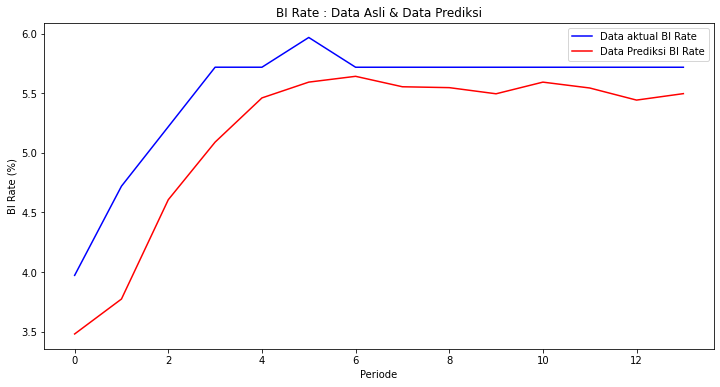

In [ ]:
#Visualisasi Data Prediksi BI Rate
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_df['BI Rate'], label='Data aktual BI Rate', color='blue')
plt.plot(denormalize_y_pred_df['BI Rate'], label='Data Prediksi BI Rate', color='red')
plt.title('BI Rate : Data Asli & Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.legend()
plt.show()

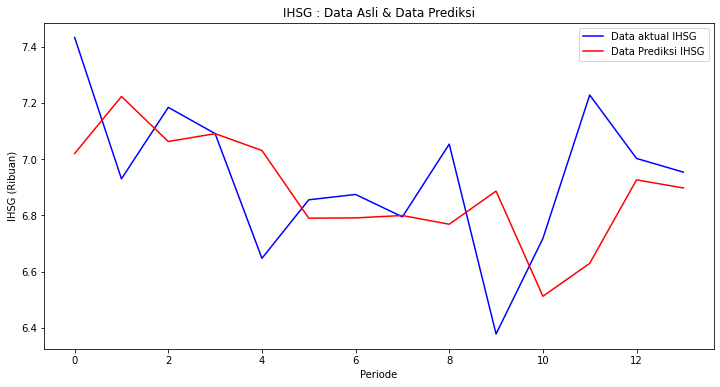

In [ ]:
#Visualisasi Data Prediksi IHSG
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_df['IHSG'], label='Data aktual IHSG', color='blue')
plt.plot(denormalize_y_pred_df['IHSG'], label='Data Prediksi IHSG', color='red')
plt.title('IHSG : Data Asli & Data Prediksi')
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.legend()
plt.show()

In [ ]:
#Evaluate the model
mse = mean_squared_error(denormalize_y_test_df, denormalize_y_pred_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(denormalize_y_test_df, denormalize_y_pred_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(denormalize_y_test_df, denormalize_y_pred_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.12786247365461584
Mean Absolute Percentage Error: 0.0484831242773128
Mean Absolute Error: 0.2800027983638089
Accuracy: 99.95151687572269


In [ ]:
#Access the loss and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

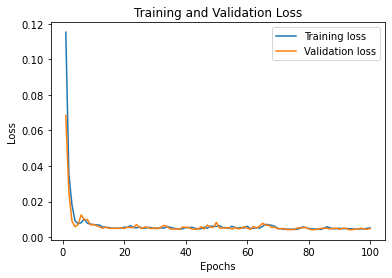

In [ ]:
# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Peramalan

In [ ]:
prediction_scale = pd.DataFrame(scaler.fit_transform(denormalize_y_test_df), columns = ['BI Rate', 'IHSG'])
prediction_scale

time_steps = 6
input_prediction = prediction_scale.tail(time_steps)
input_prediction

x_input_prediction = np.array(input_prediction).reshape(1,-1)
x_input_prediction = x_input_prediction.reshape((time_steps, 1, 2))
x_input_prediction

monthly_input_prediction = list(x_input_prediction)
monthly_input_prediction = monthly_input_prediction[0].tolist()
monthly_input_prediction

yhat_prediction = model.predict(x_input_prediction)
yhat_prediction

# Peramalan
from numpy import array

output_peramalan_prediction = []
time_steps = 6
i = 0

#print(daily_input)
print("{} monthly input {}".format(i, monthly_input_prediction))

#print(x_input)
print("{} monthly output {}".format(i, yhat_prediction))
monthly_input_prediction.extend(yhat_prediction.tolist())
monthly_input_prediction = monthly_input_prediction[1:]

#print(daily_input)
output_peramalan_prediction.extend(yhat_prediction.tolist())
i = i+1

print(output_peramalan_prediction)

output_forecast_prediction = scaler.inverse_transform(output_peramalan_prediction)
output_forecast_prediction = np.array(output_forecast_prediction)
output_forecast_prediction = pd.DataFrame(output_forecast_prediction, columns = ['BI Rate', 'IHSG'])
output_forecast_prediction

1/1 [==============================] - 0s 475ms/step
0 monthly input [[0.8748303991604434, 0.640292421799523]]
0 monthly output [[0.7460347  0.5436198 ]
 [0.80467486 0.10606444]
 [0.7792188  0.33801755]
 [0.7253807  0.6335548 ]
 [0.75162274 0.514926  ]
 [0.7567688  0.4866081 ]]
[[0.7460346817970276, 0.5436198115348816], [0.8046748638153076, 0.10606443881988525], [0.7792187929153442, 0.3380175530910492], [0.7253807187080383, 0.6335548162460327], [0.75162273645401, 0.514926016330719], [0.7567688226699829, 0.48660808801651]]


,BI Rate,IHSG
0,5.461847,6.951323
1,5.578997,6.489805
2,5.528141,6.734461
3,5.420585,7.046184
4,5.473010,6.921058
5,5.483291,6.891189


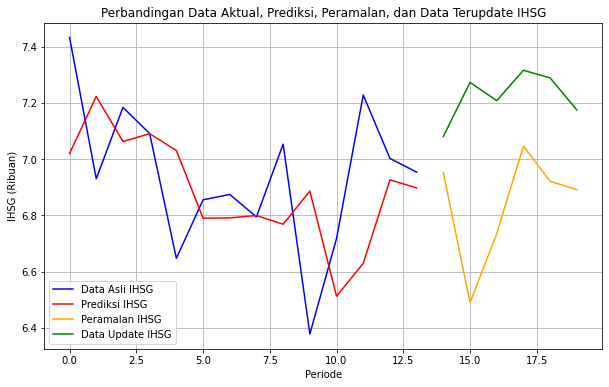

In [ ]:
#Plot
plt.figure(figsize=(10, 6))
plt.plot(denormalize_y_test_df['IHSG'], label="Data Asli IHSG", color="blue")
plt.plot(denormalize_y_pred_df['IHSG'], label="Prediksi IHSG", color="red")

#Mengatur ulang indeks data update dan forecast1_df
forecast1_df_reindexed = output_forecast_prediction.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)


#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(forecast1_df_reindexed)), forecast1_df_reindexed['IHSG'], color='orange', label='Peramalan IHSG')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['IHSG'], color='green', label='Data Update IHSG')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan, dan Data Terupdate IHSG')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


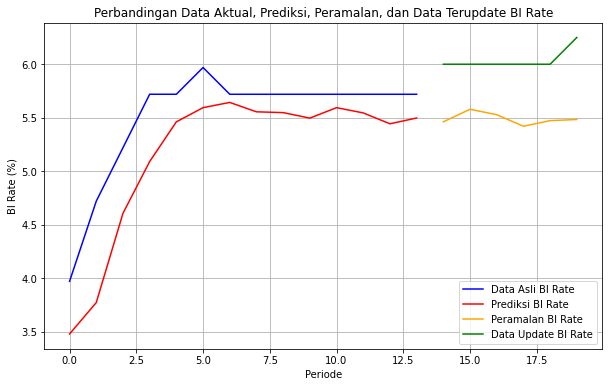

In [ ]:
#Plot
plt.figure(figsize=(10, 6))
plt.plot(denormalize_y_test_df['BI Rate'], label="Data Asli BI Rate", color="blue")
plt.plot(denormalize_y_pred_df['BI Rate'], label="Prediksi BI Rate", color="red")

#Mengatur ulang indeks data update dan forecast1_df
forecast1_df_reindexed = output_forecast_prediction.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)


#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(forecast1_df_reindexed)), forecast1_df_reindexed['BI Rate'], color='orange', label='Peramalan BI Rate')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['BI Rate'], color='green', label='Data Update BI Rate')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan, dan Data Terupdate BI Rate')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


## Data Residual

In [ ]:
# Load the data
data_res = pd.read_excel('dataresidual_sama.xlsx')
# Buat rentang tanggal berdasarkan jumlah baris dalam data
datares_index = pd.date_range(start='2007-03-01', periods=len(data_res), freq='M')

# Atur indeks DataFrame
data_res.index = datares_index
data_res

,Residual BI Rate,Residual IHSG
2007-03-31,-0.117026,0.051080
2007-04-30,0.140718,0.115692
2007-05-31,-0.223682,0.042276
2007-06-30,-0.109632,0.003021
2007-07-31,-0.111833,0.161340
...,...,...
2021-09-30,0.019905,0.105103
2021-10-31,0.024014,0.265609
2021-11-30,0.036242,-0.117837
2021-12-31,0.009870,0.033752


In [ ]:
data_test_res = pd.read_excel('dataresidualtest_sama.xlsx')
# Buat rentang tanggal berdasarkan jumlah baris dalam data
datarestest_index = pd.date_range(start='2022-02-01', periods=len(data_test_res), freq='M')
# Atur indeks DataFrame
data_test_res.index = datarestest_index
data_test_res

,Residual BI Rate,Residual IHSG
2022-02-28,-0.119731,-0.050993
2022-03-31,-0.045126,-0.034594
2022-04-30,-0.006984,-0.256170
2022-05-31,0.012067,-0.180511
2022-06-30,0.021533,0.251808
2022-07-31,0.276231,0.161794
2022-08-31,0.278562,-0.391898
2022-09-30,0.029718,0.168993
2022-10-31,0.030292,-0.102681
2022-11-30,-0.219423,-0.240182


In [ ]:
# Scale the data
scaler = MinMaxScaler()
train_data_res = scaler.fit_transform(data_res)
test_data_res = scaler.fit_transform(data_test_res)

In [ ]:
def sequence_generator(data, time_steps):
    sequences, labels = [], []
    for i in range(time_steps, len(data)):
        seq = data[i - time_steps:i, 0:data.shape[1]]
        label = data[i, 0:data.shape[1]]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

def create_model(time_steps, GRU_units, Dense_units):
    model = Sequential()
    model.add(GRU(units=GRU_units, input_shape=(time_steps, 2), activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(BatchNormalization())
    model.add(Dense(units=Dense_units, activation='tanh'))
    model.add(Dense(2, activation='tanh'))


    # Use Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=0.01)

    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [ ]:
#Specify hyperparameters to search
param_grid = {
    'GRU_units': [32, 64, 128],  # Number of units in GRU layer
    'Dense_units': [32, 64, 128],
    'batch_size': [32, 64],
    'time_steps' : [3, 4, 5, 6]
}


In [ ]:
%%time
# Model KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
gru_model = KerasRegressor(build_fn=create_model, verbose=0)
time_steps = 6
X_train_res, y_train_res = sequence_generator(train_data_res, time_steps)

# Grid Search untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=gru_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose = 1)
grid_search.fit(X_train_res, y_train_res, epochs=100)

#Get the best hyperparameters
best_params = grid_search.best_params_

#Now you can use best_params to create sequences for the test data
X_test_res, y_test_res = sequence_generator(test_data_res, best_params['time_steps'])

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: total: 4min 55s
Wall time: 7min 10s


In [ ]:
print("\n Parameter Terbaik  {}".format(grid_search.best_params_))


 Parameter Terbaik  {'Dense_units': 32, 'GRU_units': 32, 'batch_size': 64, 'time_steps': 6}


In [ ]:
#Train the final model with the best hyperparameters and include validation data
final_model_res = create_model(best_params['time_steps'], best_params['GRU_units'], best_params['Dense_units'])
history_res = final_model_res.fit(X_train_res, y_train_res, epochs=100, batch_size=best_params['batch_size'], validation_data=(X_train_res, y_train_res), validation_split=0.2, verbose=2)

Epoch 1/100
3/3 - 6s - loss: 0.5256 - val_loss: 0.1303 - 6s/epoch - 2s/step
Epoch 2/100
3/3 - 0s - loss: 0.2104 - val_loss: 0.0664 - 66ms/epoch - 22ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0666 - val_loss: 0.0349 - 85ms/epoch - 28ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0327 - val_loss: 0.0225 - 65ms/epoch - 22ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0303 - val_loss: 0.0223 - 73ms/epoch - 24ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0402 - val_loss: 0.0284 - 125ms/epoch - 42ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0426 - val_loss: 0.0404 - 84ms/epoch - 28ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0385 - val_loss: 0.0570 - 81ms/epoch - 27ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0325 - val_loss: 0.0660 - 95ms/epoch - 32ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0261 - val_loss: 0.0511 - 96ms/epoch - 32ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0227 - val_loss: 0.0294 - 84ms/epoch - 28ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0192 - val_loss: 0.0297 - 117ms/epoch - 39ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0171 - 

In [ ]:
# Make predictions on the test set
y_pred_res = final_model_res.predict(X_test_res)

1/1 [==============================] - 1s 687ms/step


In [ ]:
# Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya
# Untuk denormalisasi hasil peramalan
denormalize_y_pred_res = scaler.inverse_transform(y_pred_res)

# Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_pred_res_df = pd.DataFrame(denormalize_y_pred_res, columns=['BI Rate', 'IHSG'])

# Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_pred_res_df

,BI Rate,IHSG
0,0.070946,-0.066352
1,0.053758,-0.153798
2,0.074879,-0.145655
3,0.065214,-0.159685
4,0.073919,-0.191501
5,0.062438,-0.032025
6,0.064601,-0.029154
7,0.053601,-0.020102
8,0.058129,-0.024201
9,0.067017,-0.149716


In [ ]:
# Menggunakan MinMaxScaler yang sama yang digunakan sebelumnya
# Untuk denormalisasi hasil peramalan
denormalize_y_test_res = scaler.inverse_transform(y_test_res)

# Membuat DataFrame dari hasil peramalan yang sudah denormalisasi
denormalize_y_test_res_df = pd.DataFrame(denormalize_y_test_res, columns=['BI Rate', 'IHSG'])

# Menampilkan hasil peramalan yang sudah denormalisasi dalam bentuk DataFrame
denormalize_y_test_res_df

,BI Rate,IHSG
0,0.278562,-0.391898
1,0.029718,0.168993
2,0.030292,-0.102681
3,-0.219423,-0.240182
4,0.030718,0.192308
5,-0.219212,-0.011937
6,0.030823,-0.068985
7,0.030840,0.121271
8,0.030848,-0.420030
9,0.030853,0.283949


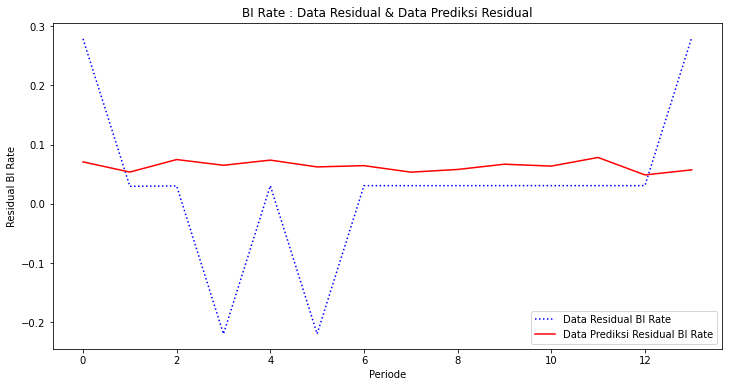

In [ ]:
#Visualisasi Data Residual BI Rate
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_res_df['BI Rate'], label='Data Residual BI Rate', color='blue', linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['BI Rate'], label='Data Prediksi Residual BI Rate', color='red')
plt.title('BI Rate : Data Residual & Data Prediksi Residual')
plt.xlabel('Periode')
plt.ylabel('Residual BI Rate')
plt.legend()
plt.show()

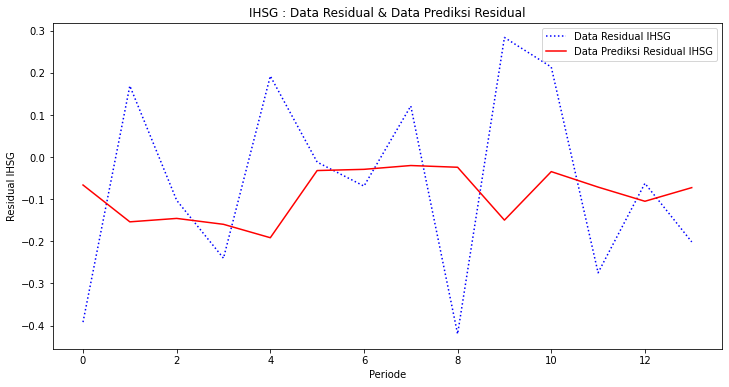

In [ ]:
#Visualisasi Data Residual BI Rate
plt.figure(figsize=(12, 6))
plt.plot(denormalize_y_test_res_df['IHSG'], label='Data Residual IHSG', color='blue', linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['IHSG'], label='Data Prediksi Residual IHSG', color='red')
plt.title('IHSG : Data Residual & Data Prediksi Residual')
plt.xlabel('Periode')
plt.ylabel('Residual IHSG')
plt.legend()
plt.show()

In [ ]:
#Evaluate the model
mse = mean_squared_error(denormalize_y_test_res_df, denormalize_y_pred_res_df)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(denormalize_y_test_res_df, denormalize_y_pred_res_df)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(denormalize_y_test_res_df, denormalize_y_pred_res_df)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.039969009904370426
Mean Absolute Percentage Error: 1.0537154427301558
Mean Absolute Error: 0.14775572783920304
Accuracy: 98.94628455726985


In [ ]:
# Access the loss and validation loss from the training history
train_loss_res = history_res.history['loss']
val_loss_res = history_res.history['val_loss']

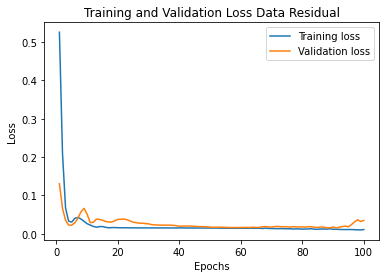

In [ ]:
# Create a range of epochs for the x-axis
epochs = range(1, len(train_loss_res) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss_res, label='Training loss')
plt.plot(epochs, val_loss_res, label='Validation loss')
plt.title('Training and Validation Loss Data Residual')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_res, y_pred_res)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test_res, y_pred_res)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mae
print(f"Accuracy: {acc}")

Mean Squared Error: 0.09937872697185876
Mean Absolute Error: 0.23731103107621265
Accuracy: 99.76268896892378


In [ ]:
y_pred_res.shape

(14, 2)

In [ ]:
residual_scale = pd.DataFrame(scaler.fit_transform(denormalize_y_test_res_df), columns = ['BI Rate', 'IHSG'])
residual_scale

time_steps = 6
input_resid = residual_scale.tail(time_steps)
input_resid

x_input_resid = np.array(input_resid).reshape(1,-1)
x_input_resid = x_input_resid.reshape((time_steps, 1, 2))
x_input_resid

monthly_input_resid = list(x_input_resid)
monthly_input_resid = monthly_input_resid[0].tolist()
monthly_input_resid

yhat_resid = final_model_res.predict(x_input_resid)
yhat_resid

# Peramalan
from numpy import array

output_peramalan_residual = []
time_steps = 6
i = 1

#print(daily_input)
print("{} monthly input {}".format(i, monthly_input_resid))

#print(x_input)
print("{} monthly output {}".format(i, yhat_resid))
monthly_input_resid.extend(yhat_resid.tolist())
monthly_input_resid = monthly_input_resid[1:]

#print(daily_input)
output_peramalan_residual.extend(yhat_resid.tolist())
i = i+1

print(output_peramalan_prediction)

output_forecast_residual = scaler.inverse_transform(output_peramalan_residual)
output_forecast_residual = np.array(output_forecast_residual)
output_forecast_residual = pd.DataFrame(output_forecast_residual, columns = ['BI Rate', 'IHSG'])
output_forecast_residual

1/1 [==============================] - 0s 79ms/step
1 monthly input [[0.500263522796865, 0.0]]
1 monthly output [[0.8198832  0.8739615 ]
 [0.76199645 0.8627197 ]
 [0.7662821  0.8661959 ]
 [0.8065211  0.87384987]
 [0.787311   0.87302786]
 [0.7795054  0.89542145]]
[[0.7460346817970276, 0.5436198115348816], [0.8046748638153076, 0.10606443881988525], [0.7792187929153442, 0.3380175530910492], [0.7253807187080383, 0.6335548162460327], [0.75162273645401, 0.514926016330719], [0.7567688226699829, 0.48660808801651]]


,BI Rate,IHSG
0,0.190748,0.195220
1,0.161788,0.187306
2,0.163932,0.189753
3,0.184063,0.195142
4,0.174453,0.194563
5,0.170548,0.210328


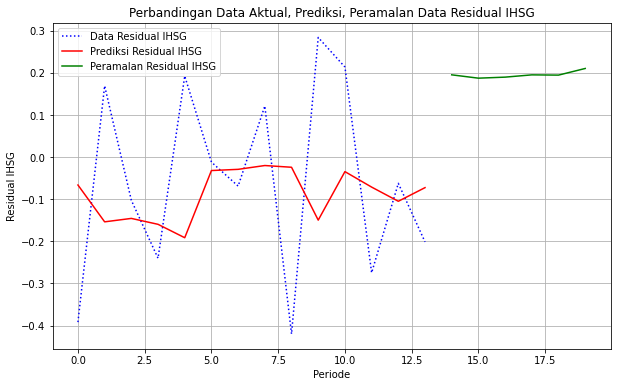

In [ ]:
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(denormalize_y_test_res_df['IHSG'], label="Data Residual IHSG", color="blue", linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['IHSG'], label="Prediksi Residual IHSG", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = output_forecast_residual.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['IHSG'], color='green', label='Peramalan Residual IHSG')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('Residual IHSG')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data Residual IHSG')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


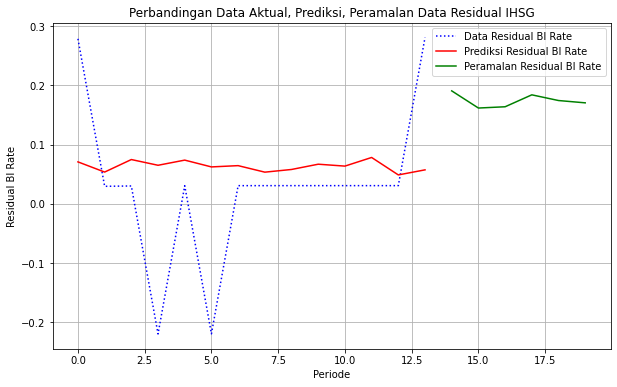

In [ ]:
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(denormalize_y_test_res_df['BI Rate'], label="Data Residual BI Rate", color="blue", linestyle='dotted')
plt.plot(denormalize_y_pred_res_df['BI Rate'], label="Prediksi Residual BI Rate", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = output_forecast_residual.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['BI Rate'], color='green', label='Peramalan Residual BI Rate')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('Residual BI Rate')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data Residual IHSG')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


In [ ]:
hybrid = denormalize_y_pred_df + denormalize_y_pred_res_df
hybrid

,BI Rate,IHSG
0,3.550209,6.953563
1,3.826481,7.068866
2,4.681592,6.916923
3,5.155604,6.930888
4,5.535495,6.839175
5,5.656652,6.757802
6,5.707534,6.761701
7,5.608827,6.779231
8,5.606013,6.744099
9,5.563272,6.736566


In [ ]:
#Input data
df = pd.read_excel("data_skripsi_sama.xlsx")

#Mengatur kolom tanggal sebagai indeks
df['Periode'] = pd.to_datetime(df['Periode'])
df.set_index('Periode', inplace=True)
#Split the data into training and testing sets (90% & 10%)
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
test_data
last_46_data = test_data[-14:].reset_index(drop=True)
last_46_data

,BI Rate,IHSG
0,4.25,7.04080
1,4.75,7.09889
2,5.25,7.08131
3,5.50,6.85062
4,5.75,6.83934
5,5.75,6.84324
6,5.75,6.80528
7,5.75,6.91572
8,5.75,6.63326
9,5.75,6.66188


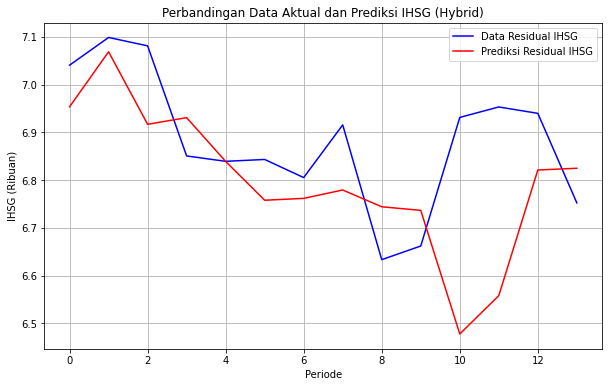

In [ ]:
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(last_46_data['IHSG'], label="Data IHSG", color="blue")
plt.plot(hybrid['IHSG'], label=" Data Prediksi IHSG", color="red")

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.title('Perbandingan Data Aktual dan Prediksi IHSG (Hybrid)')
plt.legend()

#Menampilkan plot
plt.grid(True)
plt.show()


In [ ]:
final_predict_IHSG = denormalize_y_pred_df['IHSG'] + denormalize_y_pred_res_df['IHSG']
final_predict_BIRate = denormalize_y_pred_df['BI Rate'] + denormalize_y_pred_res_df['BI Rate']
final_predict = pd.DataFrame({'Prediksi BI Rate':final_predict_BIRate, 'Prediksi IHSG':final_predict_IHSG})
final_predict

,Prediksi BI Rate,Prediksi IHSG
0,3.550209,6.953563
1,3.826481,7.068866
2,4.681592,6.916923
3,5.155604,6.930888
4,5.535495,6.839175
5,5.656652,6.757802
6,5.707534,6.761701
7,5.608827,6.779231
8,5.606013,6.744099
9,5.563272,6.736566


In [ ]:
final_IHSG = denormalize_y_test_df['IHSG'] + denormalize_y_test_res_df['IHSG']
final_BIRate = denormalize_y_test_df['BI Rate'] + denormalize_y_test_res_df['BI Rate']
final_df = pd.DataFrame({'BI Rate':final_BIRate, 'IHSG':final_IHSG})
final_df

,BI Rate,IHSG
0,4.25,7.04080
1,4.75,7.09889
2,5.25,7.08131
3,5.50,6.85062
4,5.75,6.83934
5,5.75,6.84324
6,5.75,6.80528
7,5.75,6.91572
8,5.75,6.63326
9,5.75,6.66188


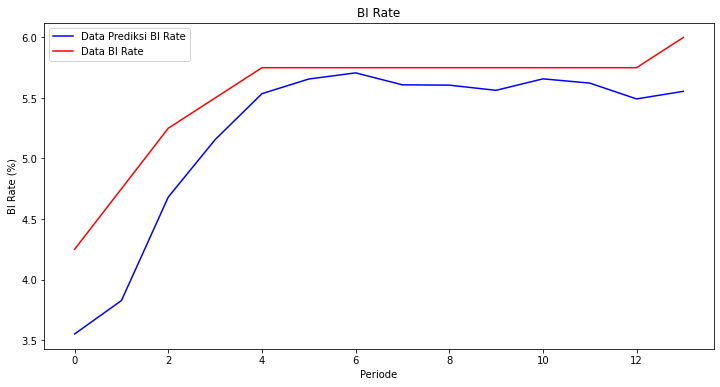

In [ ]:
#Visualisasi Data BI Rate
plt.figure(figsize=(12, 6))
plt.plot(final_predict['Prediksi BI Rate'], label='Data Prediksi BI Rate', color='blue')
plt.plot(final_df['BI Rate'], label='Data BI Rate', color='red')
plt.title('BI Rate')
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.legend()
plt.show()

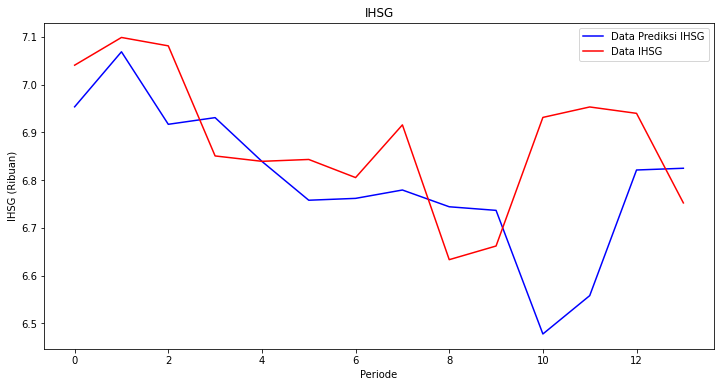

In [ ]:
#Visualisasi Data BI Rate
plt.figure(figsize=(12, 6))
plt.plot(final_predict['Prediksi IHSG'], label='Data Prediksi IHSG', color='blue')
plt.plot(final_df['IHSG'], label='Data IHSG', color='red')
plt.title('IHSG')
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.legend()
plt.show()

In [ ]:
final_forecast_IHSG = output_forecast_prediction['IHSG'] + output_forecast_residual['IHSG']
final_forecast_BIRate = output_forecast_prediction['BI Rate'] + output_forecast_residual['BI Rate']
final_forecast = pd.DataFrame({'BI Rate':final_forecast_BIRate, 'IHSG':final_forecast_IHSG})
final_forecast

,BI Rate,IHSG
0,5.652595,7.146544
1,5.740785,6.677111
2,5.692073,6.924214
3,5.604648,7.241325
4,5.647463,7.115621
5,5.653839,7.101517


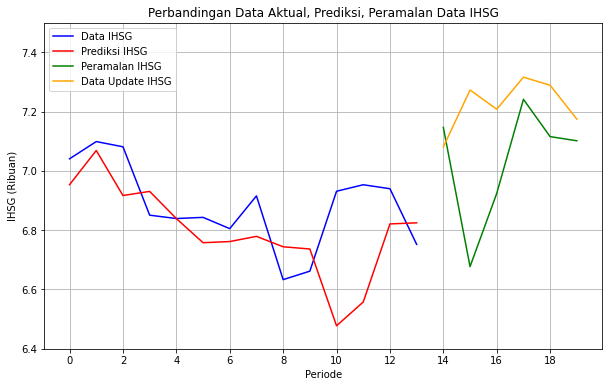

In [ ]:
#VISUALISASI HYBRID
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(final_df['IHSG'], label="Data IHSG", color="blue")
plt.plot(final_predict['Prediksi IHSG'], label="Prediksi IHSG", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = final_forecast.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['IHSG'], color='green', label='Peramalan IHSG')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['IHSG'], color='orange', label='Data Update IHSG')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('IHSG (Ribuan)')
plt.ylim(6.4,7.5)
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data IHSG')
plt.legend()
total_length = max(len(final_df), len(final_predict), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed), len(denormalize_y_test_df) + len(data_update_reindexed))
plt.xticks(np.arange(0, total_length, step=2))
#Menampilkan plot
plt.grid(True)
plt.show()

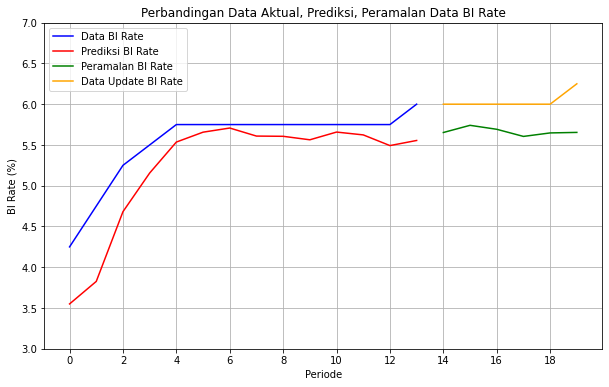

In [ ]:
#VISUALISASI HYBRID
#Pplot
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
plt.plot(final_df['BI Rate'], label="Data BI Rate", color="blue")
plt.plot(final_predict['Prediksi BI Rate'], label="Prediksi BI Rate", color="red")

#Mengatur ulang indeks forecast_res_df
forecast_res_df_reindexed = final_forecast.reset_index(drop=True)
data_update_reindexed = data_update.reset_index(drop=True)

#Plot hasil peramalan dengan warna kuning dan indeks yang berlanjut
plt.plot(range(len(denormalize_y_test_res_df), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed)), forecast_res_df_reindexed['BI Rate'], color='green', label='Peramalan BI Rate')
plt.plot(range(len(denormalize_y_test_df), len(denormalize_y_test_df) + len(data_update_reindexed)), data_update_reindexed['BI Rate'], color='orange', label='Data Update BI Rate')

#Menambahkan label sumbu dan judul plot
plt.xlabel('Periode')
plt.ylabel('BI Rate (%)')
plt.title('Perbandingan Data Aktual, Prediksi, Peramalan Data BI Rate')
plt.ylim(3,7)
plt.legend()
total_length = max(len(final_df), len(final_predict), len(denormalize_y_test_res_df) + len(forecast_res_df_reindexed), len(denormalize_y_test_df) + len(data_update_reindexed))
plt.xticks(np.arange(0, total_length, step=2))
#Menampilkan plot
plt.grid(True)
plt.show()

In [ ]:
#Evaluasi Model Hybrid
mse = mean_squared_error(data_update, final_forecast)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(data_update, final_forecast)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(data_update, final_forecast)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.1166074674315869
Mean Absolute Percentage Error: 0.04559839495158479
Mean Absolute Error: 0.2937335390913426
Accuracy: 99.95440160504842


In [ ]:
#Evaluasi Model Hybrid
mse = mean_squared_error(final_df, final_predict)
print(f"Mean Squared Error: {mse}")
mape = mean_absolute_percentage_error(final_df, final_predict)
print(f"Mean Absolute Percentage Error: {mape}")
mae = mean_absolute_error(final_df, final_predict)
print(f"Mean Absolute Error: {mae}")
acc = 100 - mape
print(f"Accuracy: {acc}")

Mean Squared Error: 0.09552367417484263
Mean Absolute Percentage Error: 0.039225519219614556
Mean Absolute Error: 0.21905250907352986
Accuracy: 99.96077448078039


In [ ]:
import numpy as np
from scipy.stats import f

def hotellings_t2(X, Y):
    # Memastikan input adalah array numpy 2D
    X = np.asarray(X)
    Y = np.asarray(Y)

    if X.ndim == 1:
        X = X.reshape(-1, 1)
    if Y.ndim == 1:
        Y = Y.reshape(-1, 1)

    # Ukuran sampel dan jumlah variabel
    n1, p = X.shape
    n2, _ = Y.shape

    # Rata-rata sampel
    X_mean = np.mean(X, axis=0)
    Y_mean = np.mean(Y, axis=0)

    # Kovariansi sampel
    S1 = np.cov(X, rowvar=False)
    S2 = np.cov(Y, rowvar=False)

 # Kovariansi gabungan (spooled)
    S_pool = ((n1 - 1) * S1 + (n2 - 1) * S2) / (n1 + n2 - 2)

    # Statistik T^2 Hotelling
    mean_diff = X_mean - Y_mean
    T2 = (n1 * n2) / (n1 + n2) * mean_diff.T @ np.linalg.inv(S_pool) @ mean_diff

    # Nilai F untuk konversi ke statistik F
    F_stat = (n1 + n2 - p - 1) * T2 / (p * (n1 + n2 - 2))

    # Derajat kebebasan
    df1 = p
    df2 = n1 + n2 - p - 1

    # Nilai p
    p_value = (1 - f.cdf(F_stat, df1, df2))

    return T2, F_stat, p_value

# Contoh penggunaan dengan dua variabel
# Data harga aktual (harga emas dan harga perak)

# Hitung uji T^2 Hotelling
T2, F_stat, p_value = hotellings_t2(final_df, final_predict)

print(f"Statistik T^2: {T2}")
print(f"Statistik F: {F_stat}")
print(f"Nilai p: {p_value}")

# Daerah kritis dan kesimpulan
alpha = 0.05
df1 = 1
df2 = len(final_df) + len(final_predict) - df1 - 1

# F-nilai kritis
F_critical = f.ppf(1 - alpha, df1, df2)

print(f"F-nilai kritis: {F_critical}")

# Kesimpulan
if F_stat > F_critical:
    print("Tolak H0: Ada perbedaan signifikan antara data aktual IHSG dan BI Rate dengan data peramalan IHSG dan BI Rate.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara data aktual IHSG dan BI Rate dengan data peramalan IHSG dan BI Rate.")

Statistik T^2: 3.2129450126410877
Statistik F: 1.5446851022312922
Nilai p: 0.23306394009266018
F-nilai kritis: 4.2252012731274835
Gagal tolak H0: Tidak ada perbedaan signifikan antara data aktual IHSG dan BI Rate dengan data peramalan IHSG dan BI Rate.
